In [4]:
import pandas as pd

df = pd.read_csv('/Users/danielseymour/Developer/EC334-Summative/processed_data/two_digit_NAICS_bds_tfp.csv')
df.head()

,year,NAICS,firms,estabs,emp,denom,estabs_entry,estabs_entry_rate,estabs_exit,estabs_exit_rate,...,reallocation_rate,firmdeath_firms,firmdeath_estabs,firmdeath_emp,Industry,Basis,weight,tfp_pct_change,tfp_index_2017,firms_percent_destroyed
0,1987,11,18421,18977,170858,170501,3109,16.513,2811,14.930,...,54.075,2058,2060,11605,"Agriculture, forestry, fishing, and hunting",All workers,0.009333,N.A.,68.776,11.172032
1,1987,21,21621,27222,578807,632507,3291,11.498,6090,21.278,...,30.951,4029,4064,31974,Mining,All workers,0.006984,N.A.,66.059,18.634661
2,1987,22,5844,12393,774290,772758,654,5.294,575,4.655,...,11.146,313,315,1606,Utilities,All workers,0.013570,N.A.,76.927,5.355921
3,1987,23,485658,492062,4965017,4877830,90479,18.838,66956,13.940,...,50.605,49892,49934,282447,Construction,All workers,0.030664,N.A.,116.637,10.273073
4,1987,31-33,286017,332737,16522435,16658447,35126,10.577,33854,10.194,...,22.779,23996,24227,300581,Manufacturing sector,All workers,0.101077,N.A.,76.544,8.389711


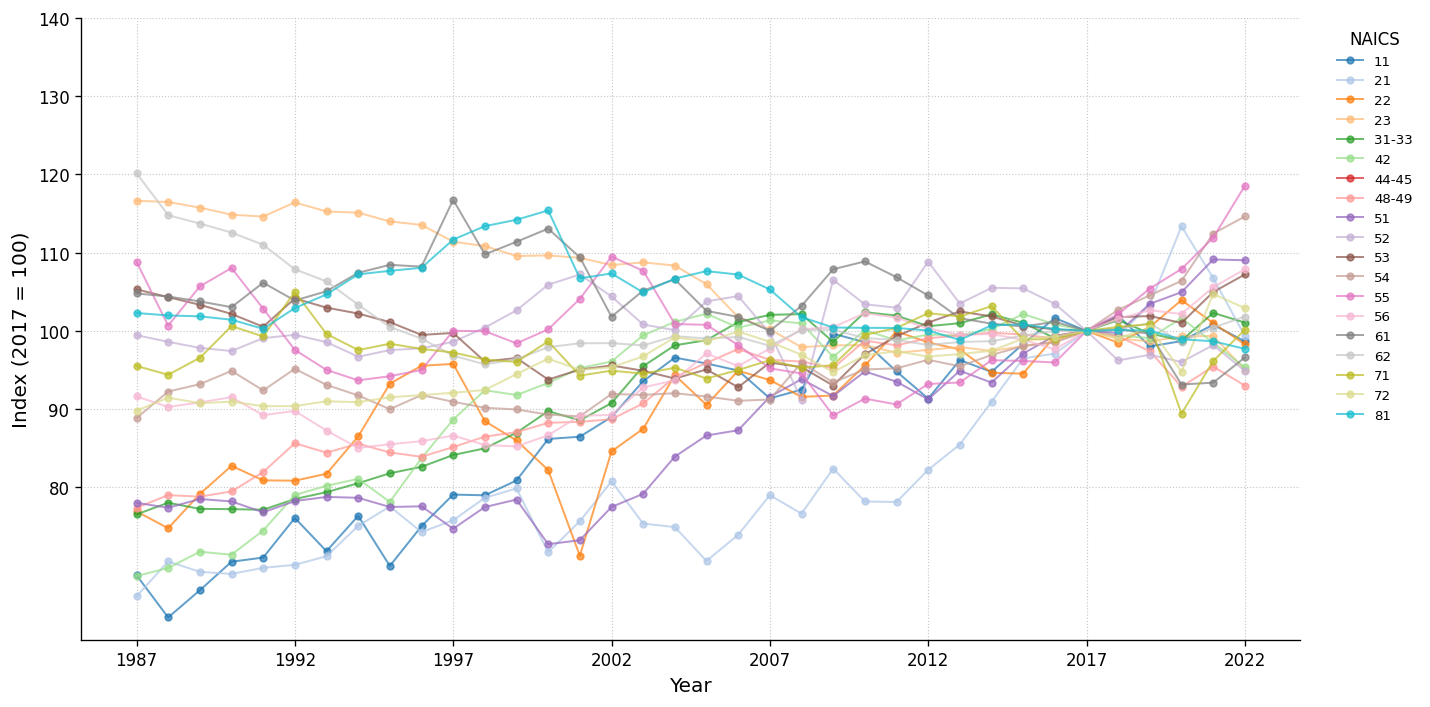

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Aggregate: get the mean index by year & NAICS
df_plot = (
    df
      .groupby(['NAICS', 'year'])['tfp_index_2017']
      .mean()
      .reset_index()
)

# 2) Set up the figure
fig, ax = plt.subplots(figsize=(12,6), dpi=120)
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# Optional: choose a qualitative colormap with ~20 distinct colors
cmap = plt.get_cmap('tab20')

# 3) Loop over each NAICS and plot its line
naics_codes = df_plot['NAICS'].unique()
for i, code in enumerate(naics_codes):
    sub = df_plot[df_plot['NAICS'] == code]
    ax.plot(
        sub['year'],
        sub['tfp_index_2017'],
        label=str(code),
        color=cmap(i % 20),
        linewidth=1.2,
        alpha=0.7,
        marker='o',
        markersize=4
    )

# 4) Ticks & labels
ax.set_xticks(range(df_plot['year'].min(), df_plot['year'].max()+1, 5))
ax.set_yticks(range(80, 141, 10))
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2017 = 100)', fontsize=12)

# 5) Legend (you may move it outside or skip it if too busy)
ax.legend(
    title='NAICS',
    bbox_to_anchor=(1.02,1),
    loc='upper left',
    fontsize=8,
    frameon=False
)

plt.tight_layout()
plt.show()

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1) Aggregate: get the mean index by year & NAICS
df_plot = (
    df
      .groupby(['NAICS', 'year'])['tfp_index_2017']
      .mean()
      .reset_index()
)

# 2) Merge with weights
if 'weight' in df.columns:
    # Calculate average weight by NAICS and year
    weights_df = (
        df
        .groupby(['NAICS', 'year'])['weight']
        .mean()
        .reset_index()
    )
    
    # Merge the weights with the TFP data
    df_plot = pd.merge(
        df_plot,
        weights_df,
        on=['NAICS', 'year'],
        how='left'
    )
    
 

In [11]:
df_plot.head(5)

,NAICS,year,tfp_index_2017,weight
0,11,1987,68.776,0.009333
1,11,1988,63.369,0.008802
2,11,1989,66.843,0.008845
3,11,1990,70.492,0.008622
4,11,1991,71.025,0.008256


In [14]:
# Calculate the weighted aggregate TFP by year, skipping NaNs
aggregate_tfp = (
    df_plot
    .dropna(subset=['tfp_index_2017', 'weight'])
    .groupby('year')
    .apply(lambda x: np.average(x['tfp_index_2017'], weights=x['weight']))
    .reset_index()
    .rename(columns={0: 'weighted_tfp'})
)

/var/folders/xw/3fpv2dn948lcf41k_wd6vbxh0000gn/T/ipykernel_69705/3306314570.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x['tfp_index_2017'], weights=x['weight']))


In [15]:
aggregate_tfp.head(5)

,year,weighted_tfp
0,1987,88.469078
1,1988,88.536818
2,1989,88.653566
3,1990,88.904343
4,1991,88.697883


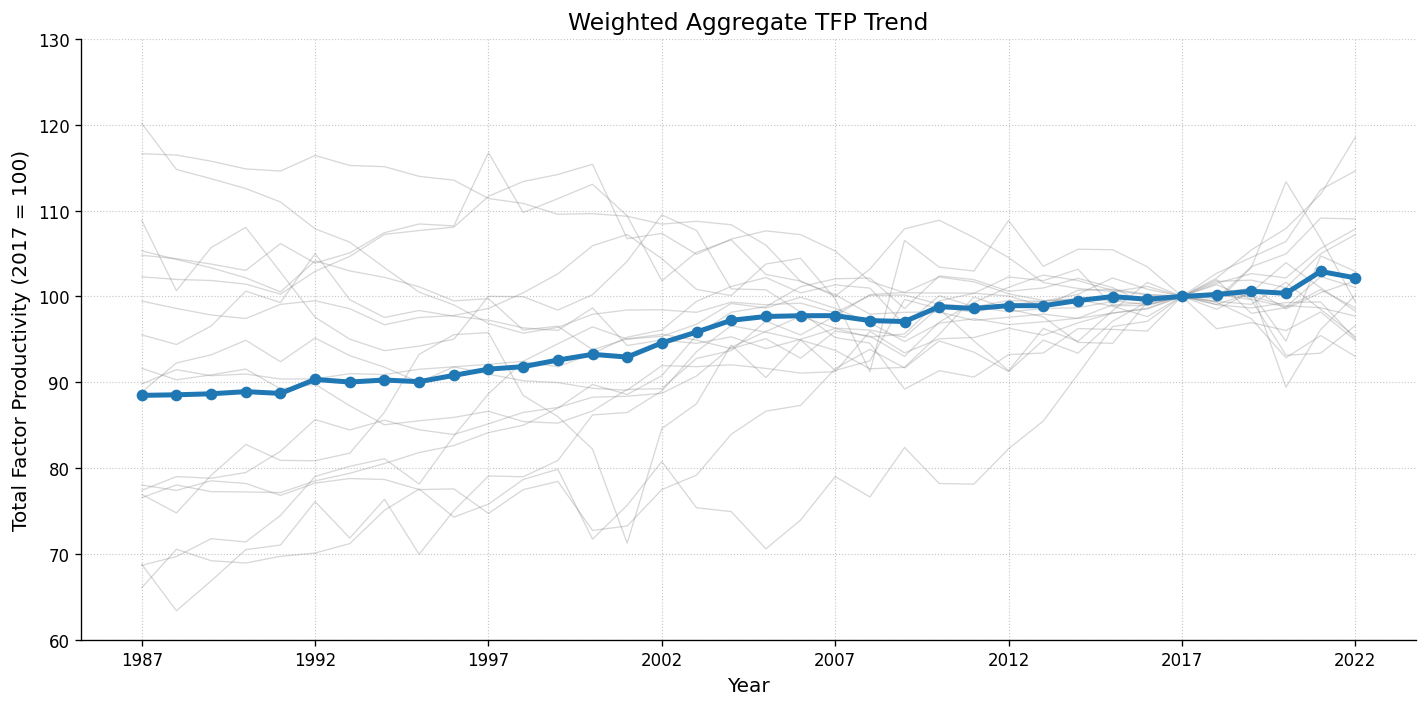

In [20]:
# 4) Set up the figure
fig, ax = plt.subplots(figsize=(12, 6), dpi=120)
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(which='major', linestyle=':', linewidth=0.7, alpha=0.7)
ax.set_axisbelow(True)

# 5) Plot all NAICS trends in grey (semi-transparent)
naics_codes = df_plot['NAICS'].unique()
for code in naics_codes:
    sub = df_plot[df_plot['NAICS'] == code]
    ax.plot(
        sub['year'],
        sub['tfp_index_2017'],
        color='grey',
        linewidth=0.8,
        alpha=0.3,
        marker='',  # No markers for individual series to reduce clutter
    )

# 6) Plot the weighted aggregate TFP in blue (bold) - IMPROVED VISIBILITY
ax.plot(
    aggregate_tfp['year'],
    aggregate_tfp['weighted_tfp'],
    label='Weighted Aggregate TFP',
    color='#1f77b4',  # Blue
    linewidth=3.0,    # Increased thickness
    alpha=1.0,
    marker='o',
    markersize=6,     # Increased marker size
    zorder=10         # Ensure it's drawn on top
)

# 7) Ticks & labels
ax.set_xticks(range(df_plot['year'].min(), df_plot['year'].max()+1, 5))

# Dynamic y-ticks based on data range
y_min = np.floor(min(df_plot['tfp_index_2017'].min(), aggregate_tfp['weighted_tfp'].min()) / 10) * 10
y_max = np.ceil(max(df_plot['tfp_index_2017'].max(), aggregate_tfp['weighted_tfp'].max()) / 10) * 10
ax.set_yticks(range(int(y_min), int(y_max)+1, 10))

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Total Factor Productivity (2017 = 100)', fontsize=12)
ax.set_title('Weighted Aggregate TFP Trend', fontsize=14)


# 9) Removed the annotation in the bottom right
import os

# Create the figures directory relative to your current working directory
os.makedirs('../figures', exist_ok=True)  # If you're in the datacleaning directory

# Save with relative path
plt.tight_layout()
plt.savefig('../figures/weighted_tfp_trends.png', dpi=300, bbox_inches='tight')  # Up one level and into figures
plt.show()